In [1]:
import sys,os,time,random
import numpy as np
import matplotlib
matplotlib.use('Agg');
import matplotlib.pyplot as plt
plt.set_cmap('jet');

import skimage
from skimage.io import imread, imsave
import pickle
import scipy

/Users/ieee8023/.local/lib/python/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
import glob
imgs = []
for filename in glob.iglob("/Users/ieee8023/Downloads/ChestXray-NIHCC/images/small/small*.png"):
    imgs.append(filename)

In [3]:
np_imgs = []
np_name = []

for imgPath in imgs:
    d = imread(imgPath).flatten().astype(np.float16)
    name = os.path.basename(imgPath).replace("small-","")
    np_imgs.append(d[:10000])
    np_name.append(name)

In [4]:
np_imgs = np.asarray(np_imgs, dtype=np.float64)

In [90]:
import pandas as pd
data = pd.read_csv("/Users/ieee8023/Downloads/ChestXray-NIHCC/Data_Entry_2017.csv")
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,058Y,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,058Y,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,058Y,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,081Y,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,081Y,F,PA,2582,2991,0.143,0.143,NaN


In [6]:
data_labels = pd.merge(pd.DataFrame(np_name, columns=["Image Index"]), data, how='left', on=['Image Index'])

In [43]:
from sklearn.manifold import TSNE
X = np_imgs
X_2d = TSNE(n_components=2, method="barnes_hut").fit_transform(X)
X_2d.shape

(4999, 2)

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 9)

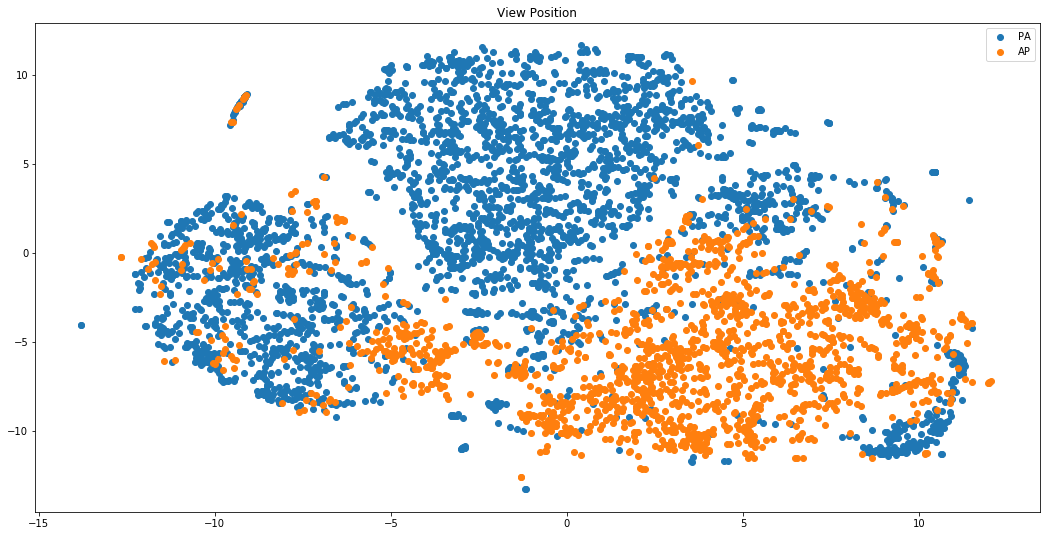

In [63]:
label = "View Position"
labels = data_labels[label]
for i,lab in enumerate(labels.unique()):
    where = np.where(labels == lab)
    plt.scatter(X_2d[where, 0], X_2d[where, 1], label=lab)
    plt.legend()
    plt.title(label)

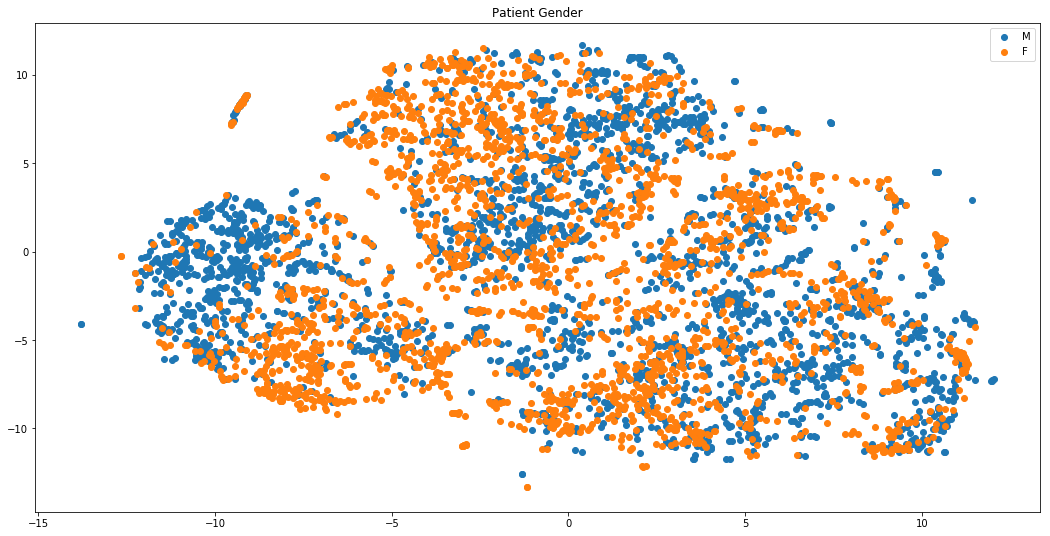

In [65]:
label = "Patient Gender"
labels = data_labels[label]
for i,lab in enumerate(labels.unique()):
    where = np.where(labels == lab)
    plt.scatter(X_2d[where, 0], X_2d[where, 1], label=lab)
    plt.legend()
    plt.title(label)

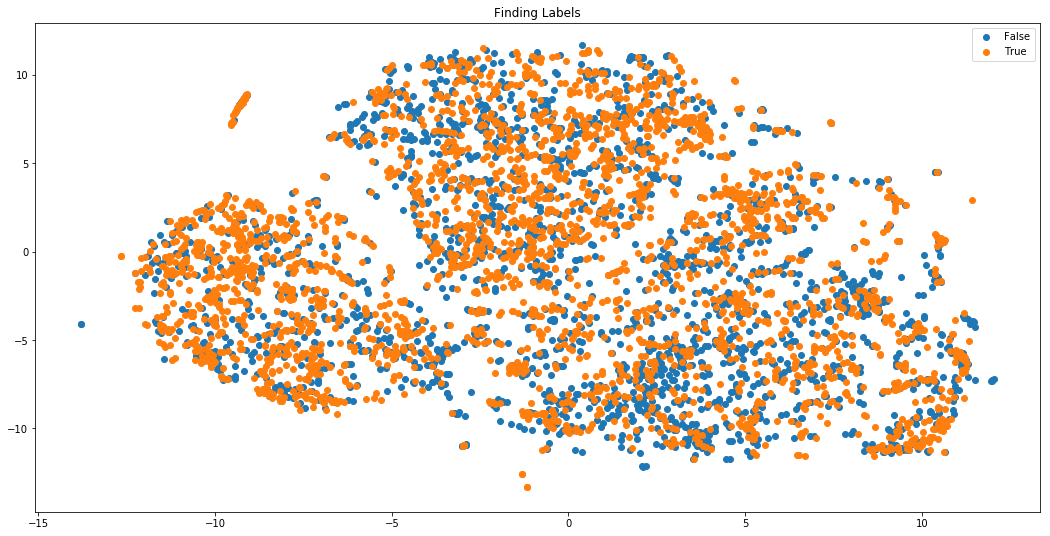

In [77]:
label = "Finding Labels"
labels = data_labels[label] =="No Finding"
for i,lab in enumerate(labels.unique()):
    where = np.where(labels == lab)
    plt.scatter(X_2d[where, 0], X_2d[where, 1], label=lab)
    plt.legend()
    plt.title(label)